
Testing on training data:
Sample 1


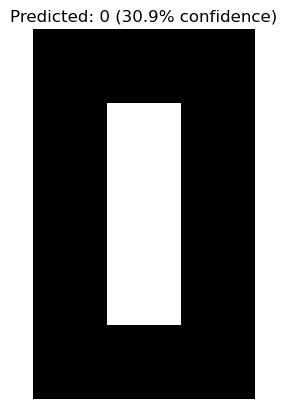

Confidence Scores: [0.31 0.29 0.02 0.   0.01 0.02 0.04 0.   0.02 0.01 0.01 0.   0.01 0.02
 0.01 0.01 0.01 0.   0.01 0.   0.01 0.   0.01 0.   0.01 0.02 0.01 0.01
 0.   0.02 0.   0.   0.   0.01 0.   0.   0.   0.01 0.   0.09]
----------------------------------------
Sample 2


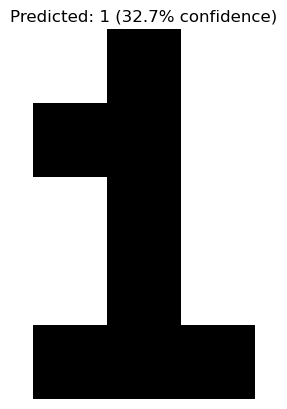

Confidence Scores: [0.21 0.33 0.03 0.   0.01 0.02 0.04 0.   0.02 0.01 0.01 0.   0.01 0.02
 0.01 0.01 0.01 0.   0.01 0.   0.01 0.   0.02 0.   0.01 0.01 0.01 0.01
 0.   0.01 0.   0.   0.   0.   0.01 0.   0.   0.01 0.   0.13]
----------------------------------------
Sample 3


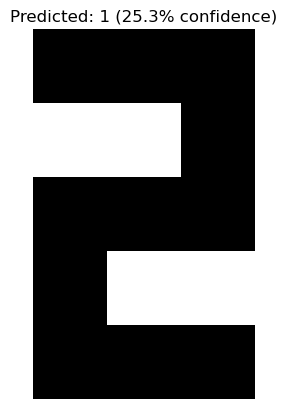

Confidence Scores: [0.19 0.25 0.05 0.   0.01 0.04 0.03 0.   0.02 0.01 0.   0.   0.03 0.03
 0.01 0.01 0.02 0.   0.01 0.   0.02 0.   0.02 0.   0.01 0.03 0.01 0.02
 0.   0.02 0.01 0.   0.   0.01 0.01 0.   0.01 0.01 0.01 0.06]
----------------------------------------
Sample 4


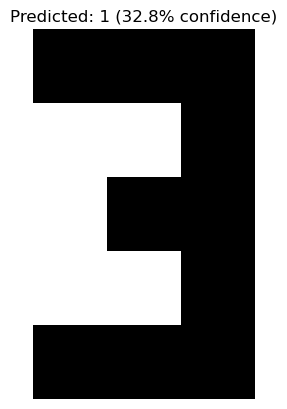

Confidence Scores: [0.2  0.33 0.03 0.   0.01 0.02 0.04 0.   0.02 0.01 0.01 0.   0.01 0.02
 0.01 0.01 0.01 0.   0.01 0.   0.01 0.   0.02 0.01 0.01 0.01 0.01 0.01
 0.   0.01 0.   0.   0.   0.   0.01 0.   0.   0.01 0.   0.14]
----------------------------------------

Enter your own 5x3 matrix (each row has 3 digits - 0 or 1):


Row 1 (e.g., 1 0 1):  1


Invalid input. Please enter 3 binary digits (0 or 1).


Row 1 (e.g., 1 0 1):  3


Invalid input. Please enter 3 binary digits (0 or 1).


Row 1 (e.g., 1 0 1):  33


Invalid input. Please enter 3 binary digits (0 or 1).


Row 1 (e.g., 1 0 1):  333


Invalid input. Please enter 3 binary digits (0 or 1).


Row 1 (e.g., 1 0 1):  33121


Invalid input. Please enter 3 binary digits (0 or 1).


Row 1 (e.g., 1 0 1):  3


Invalid input. Please enter 3 binary digits (0 or 1).


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

# Define digit matrices (5x3) for digits 0, 1, 2, and 39
def create_data():
    digits = {
        0: [
            [1, 1, 1],
            [1, 0, 1],
            [1, 0, 1],
            [1, 0, 1],
            [1, 1, 1],
        ],
        1: [
            [0, 1, 0],
            [1, 1, 0],
            [0, 1, 0],
            [0, 1, 0],
            [1, 1, 1],
        ],
        2: [
            [1, 1, 1],
            [0, 0, 1],
            [1, 1, 1],
            [1, 0, 0],
            [1, 1, 1],
        ],
        39: [
            [1, 1, 1],
            [0, 0, 1],
            [0, 1, 1],
            [0, 0, 1],
            [1, 1, 1],
        ]
    }

    X, y = [], []
    for label, matrix in digits.items():
        X.append(np.array(matrix))
        y.append(label)
    return np.array(X), np.array(y)

# Display a matrix as an image
def display_digit(matrix, title=""):
    plt.imshow(matrix.squeeze(), cmap='gray_r')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Prepare data
X, y = create_data()
X = X.reshape(len(X), 5, 3, 1)
y_encoded = tf.keras.utils.to_categorical(y)

# Build and train model
model = Sequential([
    Input(shape=(5, 3, 1)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y_encoded, epochs=100, verbose=0)

# Evaluate on training data
print("\nTesting on training data:")
for i, sample in enumerate(X):
    pred = model.predict(sample.reshape(1, 5, 3, 1), verbose=0)
    predicted_class = np.argmax(pred)
    confidence = np.max(pred) * 100
    print(f"Sample {i + 1}")
    display_digit(sample, title=f"Predicted: {predicted_class} ({confidence:.1f}% confidence)")
    print(f"Confidence Scores: {np.round(pred[0], 2)}")
    print("-" * 40)

# ---------- USER INPUT ----------
print("\nEnter your own 5x3 matrix (each row has 3 digits - 0 or 1):")
user_matrix = []
for i in range(5):
    while True:
        row = input(f"Row {i + 1} (e.g., 1 0 1): ").strip().split()
        if len(row) == 3 and all(bit in ('0', '1') for bit in row):
            user_matrix.append([int(b) for b in row])
            break
        else:
            print("Invalid input. Please enter 3 binary digits (0 or 1).")

user_input = np.array(user_matrix).reshape(1, 5, 3, 1)
user_pred = model.predict(user_input, verbose=0)
user_class = np.argmax(user_pred)
user_confidence = np.max(user_pred) * 100

print("\nYour Input:")
display_digit(user_input[0], title=f"Predicted: {user_class} ({user_confidence:.1f}% confidence)")
print(f"Prediction Probabilities: {np.round(user_pred[0], 2)}")
